This is the first visualization,
It display the relationship between budget and gross (domestic and worldwide)

Before we run the code, import every package that we will use

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

open and check data

In [2]:
# open zipped data files
df_gross = pd.read_csv("df_gross.zip")
df_rating = pd.read_csv("df_rating.zip")

In [3]:
# check df files
df_rating.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id.1,averagerating,numvotes,title,studio,domestic_gross,year
0,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",tt1375666,8.8,1841066,Inception,WB,292600000.0,2010
1,tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller",tt1345836,8.4,1387769,The Dark Knight Rises,WB,448100000.0,2012
2,tt0816692,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",tt0816692,8.6,1299334,Interstellar,Par.,188000000.0,2014
3,tt1853728,Django Unchained,Django Unchained,2012,165.0,"Drama,Western",tt1853728,8.4,1211405,Django Unchained,Wein.,162800000.0,2012
4,tt0993846,The Wolf of Wall Street,The Wolf of Wall Street,2013,180.0,"Biography,Crime,Drama",tt0993846,8.2,1035358,The Wolf of Wall Street,Par.,116900000.0,2013


In [4]:
df_gross.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id.1,averagerating,numvotes,title,studio,domestic_gross_x,year,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross
0,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",tt1375666,8.8,1841066,Inception,WB,292600000.0,2010,38,"Jul 16, 2010",Inception,160000000,292576195,835524642
1,tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller",tt1345836,8.4,1387769,The Dark Knight Rises,WB,448100000.0,2012,11,"Jul 20, 2012",The Dark Knight Rises,275000000,448139099,1084439099
2,tt0816692,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",tt0816692,8.6,1299334,Interstellar,Par.,188000000.0,2014,32,"Nov 5, 2014",Interstellar,165000000,188017894,666379375
3,tt1853728,Django Unchained,Django Unchained,2012,165.0,"Drama,Western",tt1853728,8.4,1211405,Django Unchained,Wein.,162800000.0,2012,69,"Dec 25, 2012",Django Unchained,100000000,162805434,449948323
4,tt0993846,The Wolf of Wall Street,The Wolf of Wall Street,2013,180.0,"Biography,Crime,Drama",tt0993846,8.2,1035358,The Wolf of Wall Street,Par.,116900000.0,2013,76,"Dec 25, 2013",The Wolf of Wall Street,100000000,116900694,389870414


In [5]:
df_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1378 entries, 0 to 1377
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           1378 non-null   object 
 1   primary_title      1378 non-null   object 
 2   original_title     1378 non-null   object 
 3   start_year         1378 non-null   int64  
 4   runtime_minutes    1378 non-null   float64
 5   genres             1378 non-null   object 
 6   movie_id.1         1378 non-null   object 
 7   averagerating      1378 non-null   float64
 8   numvotes           1378 non-null   int64  
 9   title              1378 non-null   object 
 10  studio             1378 non-null   object 
 11  domestic_gross_x   1378 non-null   float64
 12  year               1378 non-null   int64  
 13  id                 1378 non-null   int64  
 14  release_date       1378 non-null   object 
 15  movie              1378 non-null   object 
 16  production_budget  1378 

In [6]:
df_gross.describe()

,start_year,runtime_minutes,averagerating,numvotes,domestic_gross_x,year,id,production_budget,domestic_gross_y,worldwide_gross
count,1378.000000,1378.000000,1378.000000,1.378000e+03,1.378000e+03,1378.000000,1378.000000,1.378000e+03,1.378000e+03,1.378000e+03
mean,2013.653120,107.301887,6.439478,1.162326e+05,6.067686e+07,2013.723512,51.831640,4.640999e+07,6.055063e+07,1.513981e+08
std,2.521108,19.720679,1.014403,1.651563e+05,8.515963e+07,2.526786,28.560692,5.543063e+07,8.518984e+07,2.350158e+08
min,2010.000000,3.000000,1.600000,5.000000e+00,8.000000e+02,2010.000000,1.000000,5.000000e+04,0.000000e+00,0.000000e+00
25%,2011.000000,95.000000,5.900000,1.517450e+04,7.250000e+06,2011.000000,27.000000,1.000000e+07,7.195253e+06,1.753941e+07
50%,2014.000000,105.000000,6.500000,6.033650e+04,3.370000e+07,2014.000000,52.000000,2.500000e+07,3.333898e+07,6.531321e+07
75%,2016.000000,118.000000,7.100000,1.397005e+05,7.390000e+07,2016.000000,76.000000,5.800000e+07,7.409887e+07,1.707416e+08
max,2019.000000,192.000000,9.200000,1.841066e+06,7.001000e+08,2018.000000,100.000000,4.106000e+08,7.000596e+08,2.048134e+09


for reference, draw boxplot including outliers, and excluding outliers

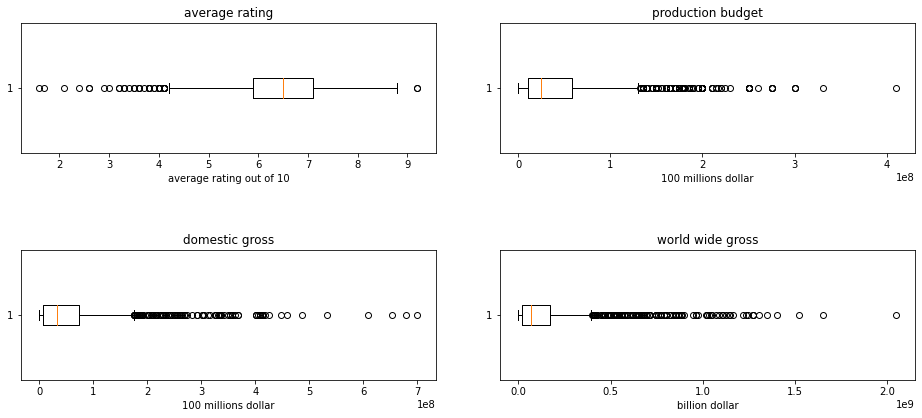

In [7]:
# for visual reference, boxplot

fig, axs = plt.subplots(2,2, figsize = (14,7))

axs[0,0].boxplot(df_gross.averagerating, vert=False)
axs[0,0].set_title('average rating')
axs[0,0].set(xlabel = 'average rating out of 10')

axs[0,1].boxplot(df_gross.production_budget, vert=False)
axs[0,1].set_title('production budget')
axs[0,1].set(xlabel = '100 millions dollar')

axs[1,0].boxplot(df_gross.domestic_gross_y, vert=False)
axs[1,0].set_title('domestic gross')
axs[1,0].set(xlabel = '100 millions dollar')

axs[1,1].boxplot(df_gross.worldwide_gross, vert=False)
axs[1,1].set_title('world wide gross')
axs[1,1].set(xlabel = 'billion dollar')
fig.tight_layout(pad=5.0)
plt.show()

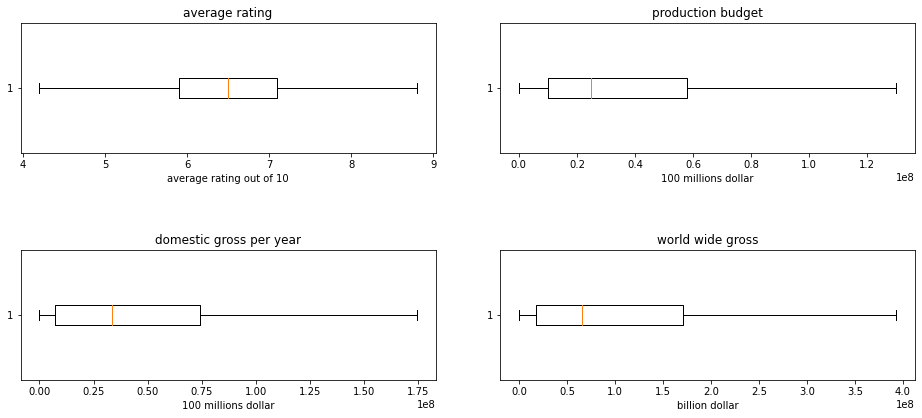

In [8]:
# visual without outliers

fig, axs = plt.subplots(2,2, figsize = (14,7))

axs[0,0].boxplot(df_gross.averagerating, vert=False, showfliers=False)
axs[0,0].set_title('average rating')
axs[0,0].set(xlabel = 'average rating out of 10')

axs[0,1].boxplot(df_gross.production_budget, vert=False, showfliers=False)
axs[0,1].set_title('production budget')
axs[0,1].set(xlabel = '100 millions dollar')

axs[1,0].boxplot(df_gross.domestic_gross_y, vert=False, showfliers=False)
axs[1,0].set_title('domestic gross per year')
axs[1,0].set(xlabel = '100 millions dollar')

axs[1,1].boxplot(df_gross.worldwide_gross, vert=False, showfliers=False)
axs[1,1].set_title('world wide gross')
axs[1,1].set(xlabel = 'billion dollar')



fig.tight_layout(pad=5.0)
plt.show()



for visual reference, draw bar plots to show relationship between genres and four variables (average rating, production budget, domestic gross, world wide gross)

<ipython-input-9-0dcf67839266>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(df_gross['genres'][:30], rotation = 45, ha = 'right')
<ipython-input-9-0dcf67839266>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(df_gross['genres'][:30], rotation = 45, ha = 'right')
<ipython-input-9-0dcf67839266>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[2].set_xticklabels(df_gross['genres'][:30], rotation = 45, ha = 'right')
<ipython-input-9-0dcf67839266>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[3].set_xticklabels(df_gross['genres'][:30], rotation = 45, ha = 'right')


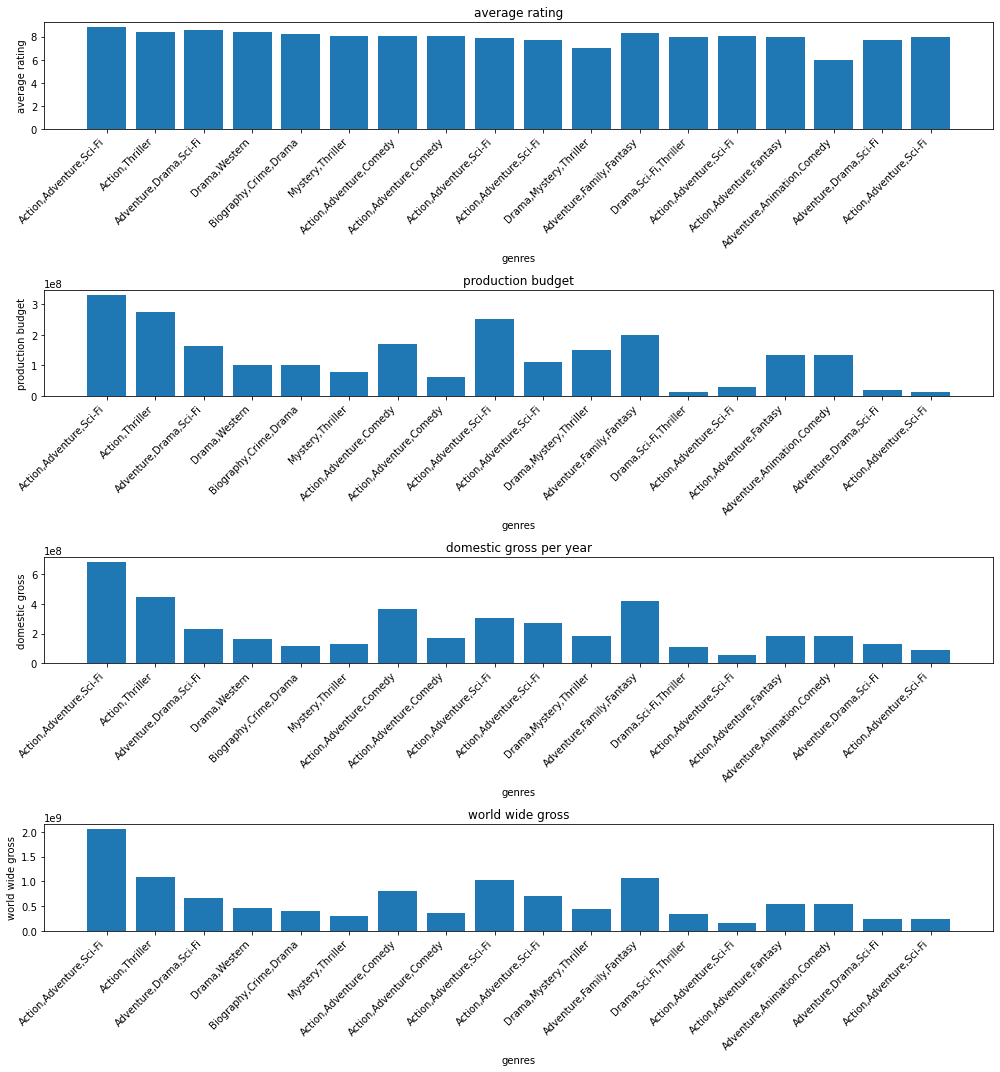

In [9]:
# bar chart 

fig, axs = plt.subplots(4,1, figsize = (14,15)) #,  constrained_layout = True)

axs[0].bar(x = df_gross['genres'][:30], height = df_gross['averagerating'][:30])
axs[0].set_title('average rating')
axs[0].set(xlabel = 'genres', ylabel = 'average rating')
axs[0].set_xticklabels(df_gross['genres'][:30], rotation = 45, ha = 'right')

axs[1].bar(x = df_gross['genres'][:30], height = df_gross['production_budget'][:30])
axs[1].set_title('production budget')
axs[1].set(xlabel = 'genres', ylabel = 'production budget')
axs[1].set_xticklabels(df_gross['genres'][:30], rotation = 45, ha = 'right')


axs[2].bar(x = df_gross['genres'][:30], height = df_gross['domestic_gross_y'][:30])
axs[2].set_title('domestic gross per year')
axs[2].set(xlabel = 'genres', ylabel = 'domestic gross')
axs[2].set_xticklabels(df_gross['genres'][:30], rotation = 45, ha = 'right')

axs[3].bar(x = df_gross['genres'][:30], height = df_gross['worldwide_gross'][:30])
axs[3].set_title('world wide gross')
axs[3].set(xlabel = 'genres', ylabel = 'world wide gross')
axs[3].set_xticklabels(df_gross['genres'][:30], rotation = 45, ha = 'right')


plt.tight_layout()
plt.show()



from the previous visualization, find the relationship between doemst gross and production budget using both correlation and line of best fit

for visualization, use value in unit of million, for calculation, use original values

In [10]:
df_gross['domestic_gross_y_in_m'] = df_gross['domestic_gross_y']/1000000
df_gross['production_budget_in_m'] = df_gross['production_budget']/1000000
df_gross['worldwide_gross_in_m'] = df_gross['worldwide_gross']/1000000

Based on the line of best fit, our slope is 1.076997095950574, and our y-intercept is 10567206.851348653
Our median production budget is 25000000.0
Using median production budgets, we project domestic gross revenue equal 26924937.9659712
Our calculated correlation is 0.7007716362149713


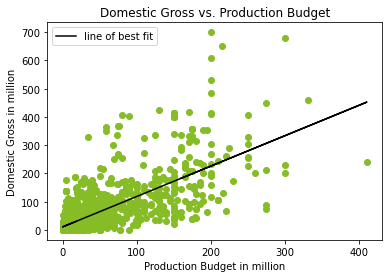

In [11]:
# first, find the correlation between domestic gross and production budget

corr = df_gross['domestic_gross_y'].corr(df_gross['production_budget'])

# draw the scatter plot between domestic gross and production budget
plt.scatter(y = df_gross['domestic_gross_y_in_m'], x = df_gross['production_budget_in_m'], c = '#86BC25')
plt.ylabel("Domestic Gross in million")
plt.xlabel("Production Budget in million")
plt.title("Domestic Gross vs. Production Budget")

# draw the line of best fit using poly fit where y = ax + b
a, b = np.polyfit( df_gross['production_budget_in_m'],df_gross['domestic_gross_y_in_m'], 1)
plt.plot(df_gross['production_budget_in_m'], a*df_gross['production_budget_in_m']+b, c = 'black')
plt.legend(['line of best fit'])

# find median and projection of production budget using line of best fit
median =df_gross['production_budget'].median()
projection = a*df_gross['production_budget'].median()+b


# print values that we used for visualization
print(f'Based on the line of best fit, our slope is {a}, and our y-intercept is {b*1000000}')
print (f'Our median production budget is {median}')
print(f'Using median production budgets, we project domestic gross revenue equal {projection}')
print(f'Our calculated correlation is {corr}')


plt.show()

budget has to be less than 35300000 to gain profit with 99 percent confidence level

Based on the line of best fit, our slope is 3.297802020879226, and our y-intercept is -1652843.9170131886
Our median production budget is 25000000.0
Using median production budgets, we project worldwide gross revenue equal 82445048.86913672
Our calculated correlation is 0.7778169650620771


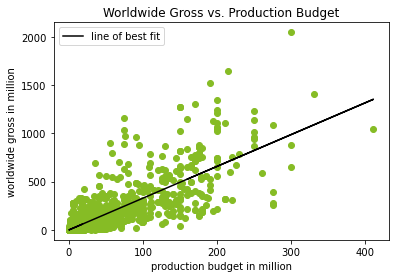

In [12]:
# find the correlation between world wide gross and production budget
corr = df_gross['worldwide_gross'].corr(df_gross['production_budget'])

# draw the scatter plot between world wide gross and production budget
plt.scatter(y = df_gross['worldwide_gross_in_m'], x = df_gross['production_budget_in_m'], c = '#86BC25')
plt.ylabel("worldwide gross in million")
plt.xlabel("production budget in million")
plt.title("Worldwide Gross vs. Production Budget")

# draw the line of best fit using poly fit where y = ax + b
a, b = np.polyfit( df_gross['production_budget_in_m'],df_gross['worldwide_gross_in_m'], 1)
plt.plot(df_gross['production_budget_in_m'], a*df_gross['production_budget_in_m']+b, c = 'black')
plt.legend(['line of best fit'])

fit = np.polyfit(np.log(df_gross['production_budget']), df_gross['worldwide_gross'], 1)

# find median and projection of production budget using line of best fit
projection = a*df_gross['production_budget'].median()+b
median =df_gross['production_budget'].median()

# print values that we used for visualization
print(f'Based on the line of best fit, our slope is {a}, and our y-intercept is {b * 1000000}')
print(f'Our median production budget is {median}')
print(f'Using median production budgets, we project worldwide gross revenue equal {projection}')
print(f'Our calculated correlation is {corr}')

plt.show()

while it is possible to gain more gross in world wide, there are higher risk showed by y-intercept